# Examining Covid19 time-series data 
    

# Importing File

In [511]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/morganchunn/Desktop/time_series_covid19_confirmed_US.csv")
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6517,6525,6533,6540,6543,6562,6570,6577,6580,6589
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,20361,20354,20395,20417,20423,20453,20473,20487,20492,20505
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2213,2213,2216,2218,2221,2224,2226,2226,2227,2227
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2529,2530,2535,2534,2535,2535,2536,2536,2537,2542
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6387,6388,6402,6408,6415,6420,6424,6426,6443,6444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,3530,3532,3547,3549,3562,3562,3562,3593,3593,3609
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2109,2111,2113,2115,2119,2119,2119,2123,2125,2128
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,889,889,890,890,890,890,890,891,891,891


# Part A 

This section of code will be used to find the numercial increase in confirmed cases from July-September. The  data is first grouped by the column "Province_State" and the number of cases in each state per day are added together. To find the increase in cases in each state between July and Spetember, the number of cases  from the first day of July are subtracted from the number of cases from last day of Septmeber. 

In [512]:
#data is grouped by the column "Province_State" and the cases per state are calculated by summing together cases represended by each state   
num_state = df.groupby("Province_State").sum()
#the specific summer dates are selected for
num_state_summer = num_state.loc[:,"7/1/20":"9/30/20"]
#number of cases  from the first day of July are subtracted from the number of cases from last day of Septmeber
state_num_increase = num_state_summer["9/30/20"].sub(num_state_summer['7/1/20'], axis = 0)
#values are sorted from high to low
partA = state_num_increase.sort_values(ascending=False)
partA

Province_State
Texas                       605198
California                  574874
Florida                     547519
Georgia                     233784
Illinois                    151707
Tennessee                   150824
North Carolina              141802
Arizona                     134402
Alabama                     115125
South Carolina              110023
Missouri                    107909
Louisiana                   107280
Ohio                        101122
Wisconsin                    93075
Virginia                     85068
Indiana                      74067
Oklahoma                     73080
Pennsylvania                 72324
Mississippi                  70290
Michigan                     66925
New York                     65081
Arkansas                     62500
Minnesota                    62418
Nevada                       60879
Iowa                         59733
Maryland                     56807
Washington                   55311
Kentucky                     52998
Utah 

# Plot of Part A

This plot shows the top 10 states with the highest numberical increase in cases.

<AxesSubplot:title={'center':'Top States with Greatest Numerical Increase in Covid Cases Over Summer'}, ylabel='State'>

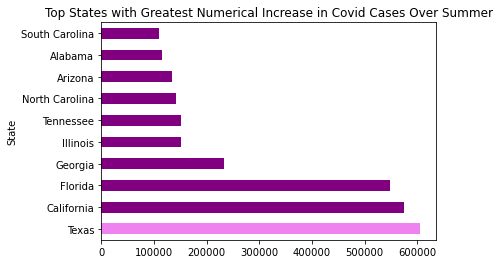

In [513]:
#the top 10 states are selected to be in the plot
part1.head(10).plot.barh(xlabel="State", title= "Top States with Greatest Numerical Increase in Covid Cases Over Summer", color = ['violet', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple','purple','purple'])
                         
                

# Part B

This section of code will be used to find the percentage increase in confirmed cases from July-September. The data is first grouped by the column "Province_State" and the number of cases in each state per day are added together. Percent increase is calculated by (X2 -X1)/ X1, where X2 is the final value and X1 is the initial. For each state, X2 is representative of the case number on September 30th and X1 is representative of cases on July 1st. 




In [514]:
states = df.groupby("Province_State").sum()
states_summer = states.loc[:,"7/1/20":"9/30/20"]

state_num_increase = states_summer["9/30/20"].sub(states_summer['7/1/20'])
#a new column is created to represent the increase in cases from the first of July to the last of September
states['State_Increases'] = states["9/30/20"].sub(states['7/1/20'])
#the percent increase is found by dividing the increase by the starting value (July 1st cases) and muliplying by 100
states['Percent_Increase'] = (states['State_Increases'] / states['7/1/20']) * 100
#the top 10 values are selected for 
per_increase = states.loc[:,'Percent_Increase'].sort_values(ascending=False).head(10)
per_increase


Province_State
Virgin Islands    1364.444444
Puerto Rico       1288.085599
Hawaii            1260.367171
Montana           1186.515748
Guam               831.835206
Alaska             647.043919
Idaho              560.094192
Oklahoma           517.600397
North Dakota       504.315353
Missouri           477.981042
Name: Percent_Increase, dtype: float64

# Plot of Part B

This plot shows the top 10 states with the greatest percentage increase.

<AxesSubplot:title={'center':'Top States with Greatest Percentage Increase in Covid Cases Over Summer'}, ylabel='Province_State'>

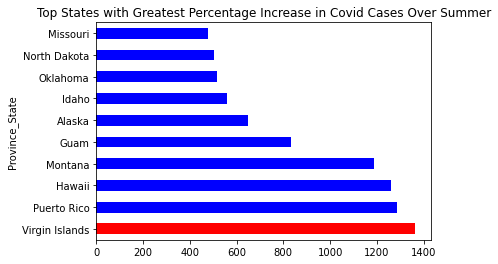

In [515]:
#the top 10 states with the greatest percentage increase are plotted in a horizontal bar graph
per_increase.plot.barh(x="Percent_Increase", y ='Province_State', title = "Top States with Greatest Percentage Increase in Covid Cases Over Summer", color=['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])


# Part C

In this section of code, the 7 day average increase per state will be calculated (mean of cases per day over a seven day period for 8 weeks, starting on June 1st and ending July 26th).
First, the average number of cases for each 7 day period (8 separate weeks total) is caluclated. This gives 8 weeks worth of 7 day averages. Then each of those 7 day weekly averages were added to the DataFrame as separate columns. The vaules were then grouped by state.

In [516]:
#mean number of cases for the first week 
states_avg_week1 = df.loc[:,"6/1/20":"6/7/20"].mean(axis=1)
#mean number of cases for the second week  
states_avg_week2 = df.loc[:,"6/8/20":"6/14/20"].mean(axis=1)
states_avg_week3 = df.loc[:,"6/15/20":"6/21/20"].mean(axis=1)
states_avg_week4 = df.loc[:,"6/22/20":"6/28/20"].mean(axis=1)
states_avg_week5 = df.loc[:,"6/29/20":"7/5/20"].mean(axis=1)
states_avg_week6 = df.loc[:,"7/6/20":"7/12/20"].mean(axis=1)
states_avg_week7 = df.loc[:,"7/13/20":"7/19/20"].mean(axis=1)
states_avg_week8 = df.loc[:,"7/20/20":"7/26/20"].mean(axis=1)

#new column added to represent the mean dumber of cases for week 1
df['Week 1'] = states_avg_week1
#new column added to represent the mean dumber of cases for week 2
df['Week 2'] = states_avg_week2
df['Week 3'] = states_avg_week3
df['Week 4'] = states_avg_week4
df['Week 5'] = states_avg_week5
df['Week 6'] = states_avg_week6
df['Week 7'] = states_avg_week7
df['Week 8'] = states_avg_week8

#the data is grouped by state and the mean between the vaules for each state
states_avg1 = df.groupby("Province_State").sum()
#week 1 - week 8 columns are sleceted for 
weeks = states_avg1.loc[:,"Week 1":"Week 8"]
weeks

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Province_State,,,,,,,,
Alabama,19502.428571,23583.142857,28452.285714,33701.000000,40935.142857,49719.428571,62120.000000,74578.000000
Alaska,549.428571,676.714286,808.285714,976.428571,1240.000000,1558.428571,2052.571429,2742.714286
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,23359.142857,31499.714286,44291.285714,63878.714286,87123.571429,112446.142857,134471.428571,153682.142857
Arkansas,8418.714286,11021.000000,14139.428571,18009.428571,21993.000000,26156.714286,31097.857143,36277.142857
California,123810.285714,144871.000000,169996.857143,207017.857143,252728.857143,308857.714286,370406.571429,435027.714286
Colorado,27321.285714,28663.571429,29912.428571,31479.571429,33307.142857,35608.142857,38725.285714,42391.571429
Connecticut,43327.857143,44550.000000,45497.142857,46022.285714,46606.428571,47169.571429,47729.285714,48419.142857
Delaware,9758.285714,10117.142857,10536.142857,10981.428571,11734.000000,12557.000000,13185.285714,13964.714286


# Plot of Part C

This plot shows the 7 day average case increase of the top 5 states (based on week 8).

<AxesSubplot:title={'center':'7-day Average Cases Number over 8 weeks'}, xlabel='7-day Time Period', ylabel='Averages'>

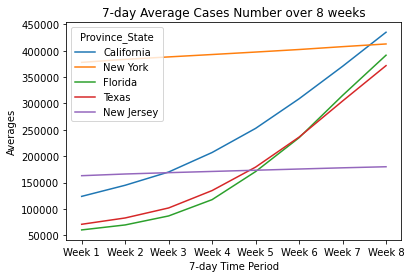

In [517]:
#the top 5 highest averages are selected for and plotted
weeks.sort_values(by="Week 8",ascending=False).head(5).T.plot.line(xlabel="7-day Time Period", ylabel="Averages", title="7-day Average Cases Number over 8 weeks")


# Part D

This section of code will be used to find what proportion of cases nationally had occurred in NY State at the start of each month, from March 2020 to August 2020. First the proportion of cases from NY were calcualted for each month. Then a new DataFrame is created to represent the calcualted data and to present it in a plot. 

In [518]:
#data is grouped by state
states_avg = df.groupby("Province_State").sum()
#the total number of cases on march 1st is calculated.. axis=0 means it will be summed vertically  
march_total = states_avg.loc[:,"3/1/20"].sum(axis=0)
#just the cases on march 1st are selected for
march = states_avg.loc[:,"3/1/20"]
#from cases on march 1st, only those from NY are selected 
march_total_NY = march['New York']
#the total numer of cases from NY on march 1st are divided by the total number of cases nationally on march 1st
pro_march = march_total_NY/ march_total
remaining_march = 1-pro_march
#the proportion is printed out 
pro_march

0.0

In [519]:
#same steps are taken for each month as was done for march 1st
states_avg = df.groupby("Province_State").sum()
april_total = states_avg.loc[:,"4/1/20"].sum(axis=0)
april = states_avg.loc[:,"4/1/20"]
april_total_NY = april['New York']
pro_april = april_total_NY/ april_total
remaining_april = 1-pro_april
pro_april

0.4024912711985179

In [520]:
states_avg = df.groupby("Province_State").sum()
may_total = states_avg.loc[:,"5/1/20"].sum(axis=0)
may = states_avg.loc[:,"5/1/20"]
may_total_NY = may['New York']
pro_may = may_total_NY/ may_total
remaining_may = 1-pro_may
pro_may


0.28029940516835045

In [521]:
states_avg = df.groupby("Province_State").sum()
june_total = states_avg.loc[:,"6/1/20"].sum(axis=0)
june = states_avg.loc[:,"6/1/20"]
june_total_NY = june['New York']
pro_june = june_total_NY/ june_total
remaining_june = 1-pro_june
pro_june

0.20638018933426863

In [522]:
states_avg = df.groupby("Province_State").sum()
july_total = states_avg.loc[:,"7/1/20"].sum(axis=0)
july = states_avg.loc[:,"7/1/20"]
july_total_NY = july['New York']
pro_july = july_total_NY/ july_total
remaining_july = 1-pro_july
pro_july

0.14716296590228706

In [523]:
states_avg = df.groupby("Province_State").sum()
august_total = states_avg.loc[:,"8/1/20"].sum(axis=0)
august = states_avg.loc[:,"7/1/20"]
august_total_NY = august['New York']
pro_august = august_total_NY/ august_total
remaining_august = 1-pro_august
pro_august

0.08574613472353373

# Plot of Part D

This plot show the proportion of cases from NY.

<AxesSubplot:title={'center':'Proportion of Cases from New York'}, xlabel='Month'>

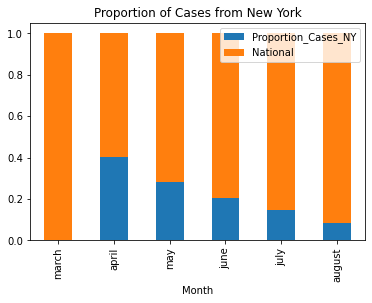

In [524]:
#new DataFrame created to represent the propotion of cases from NY at the start of each month 
propotion_data = pd.DataFrame({'Month': ['march', 'april', 'may', 'june', 'july', 'august'], 'Proportion_Cases_NY' :[pro_march, pro_april, pro_may, pro_june, pro_july, pro_august], 'National': [remaining_march, remaining_april, remaining_may, remaining_june, remaining_july, remaining_august]})
#plot of the new DataFrame
propotion_data.set_index("Month").plot.bar(stacked=True, title = 'Proportion of Cases from New York')
